In [2]:
%load_ext autoreload
%autoreload 2

In [34]:
"""
Imports
"""

import os
from dataclasses import dataclass

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# Check Dataset

In [41]:
from mnist_noisy_recon_train import MNISTNoisyReconDataModule
dm = MNISTNoisyReconDataModule()

In [42]:
dm.setup(stage='fit')

16:47:41 | INFO     | Total Dataset       : 60000 samples
16:47:41 | INFO     | Train Dataset       : 48000 samples
16:47:41 | INFO     | Validation Dataset  : 12000 samples


In [43]:
len(dm.train_dataset[0])

3

In [45]:
original_image, noisy_image, cls = dm.train_dataset[0]
original_image.shape, noisy_image.shape, cls

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), 3)

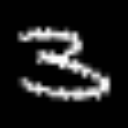

In [46]:
TF.resize(TF.to_pil_image(original_image), [128, 128])

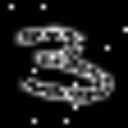

In [47]:
TF.resize(TF.to_pil_image(noisy_image), [128, 128])

# Check Data Module

In [48]:
dl = dm.train_dataloader()
original_images, noisy_images, y = next(iter(dl))

AttributeError: 'int' object has no attribute 'shape'

In [50]:
original_images.shape, noisy_images.shape, y.shape

(torch.Size([512, 1, 28, 28]), torch.Size([512, 1, 28, 28]), torch.Size([512]))

# Visualize Samples

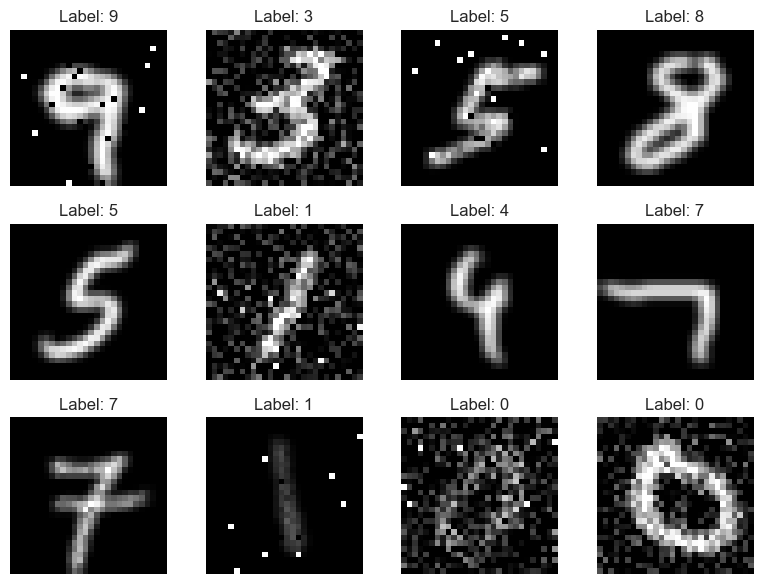

In [22]:
from utils.visualize import visualize_X_samples_grid
visualize_X_samples_grid(original_images, y, n_samples=12, n_cols=4)

# Check Model

In [32]:
encoding_dim = 128  # 2nd layer num features (the latent dim)
flat_image_length = 28 * 28  # MNIST image shape : 28 * 28

from mnist_recon_train import MNISTReconAutoencoder
model = MNISTReconAutoencoder(flat_image_length, encoding_dim=128)

In [36]:
X.shape, X[0].shape

(torch.Size([128, 1, 28, 28]), torch.Size([1, 28, 28]))

In [37]:
out = model(X)
out.shape

20:54:01 | DEBUG    | Input shape : torch.Size([128, 1, 28, 28])
20:54:01 | DEBUG    | Flattened : torch.Size([128, 784])
20:54:01 | DEBUG    | Encoder Output shape : torch.Size([128, 128])
20:54:01 | DEBUG    | Decoder Output shape : torch.Size([128, 784])
20:54:01 | DEBUG    | Reshape back to original : torch.Size([128, 1, 28, 28])


torch.Size([128, 1, 28, 28])

In [34]:
out = model(X[0])
out.shape

20:53:22 | DEBUG    | Input shape : torch.Size([1, 28, 28])
20:53:22 | DEBUG    | Flattened : torch.Size([1, 784])
20:53:22 | DEBUG    | Encoder Output shape : torch.Size([1, 128])
20:53:22 | DEBUG    | Decoder Output shape : torch.Size([1, 784])
20:53:22 | DEBUG    | Reshape back to original : torch.Size([1, 1, 28, 28])


torch.Size([1, 1, 28, 28])

# Check Lightning